# Thumbnail

Here we render an animated thumbnail for the JOV homepage (GIF, 96x96 pixel). 

The rendering uses the *manim* python library ([install instructions](https://docs.manim.community/en/stable/installation.html)). We used the Linux system instructions, without a conda environment, to avoid rendering issues.

The result is saved in `./media/videos/notebooks/96p30/...gif`

In [80]:
from manim import *

config.background_color = WHITE
config.frame_height = config.frame_width = 2.4

[1. 0. 0.]


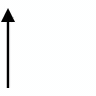

In [125]:
%%manim --format=gif -r 96,96 -qm -v WARNING PointMovingOnShapes


class PointMovingOnShapes(Scene):
    def construct(self):
        circle = Circle(radius=1, color=BLUE)
        print(RIGHT)
        arrow_1 = Arrow(start=[-1, -1, 0], end=[-1, 1, 0], buff=0, color=BLACK)
        arrow_2 = Arrow(start=[-1, -1, 0], end=[-1, 1, 0], buff=0, color=BLACK)
        dots = VGroup(Dot([0, -0.8, 0], color=BLUE),
                      Dot([0, -0.3, 0], color=BLUE),
                      Dot([0, -.1, 0], color=BLUE),
                      Dot([0, 0.3, 0], color=BLUE),
                      Dot([0, 0.7, 0], color=BLUE))
        
        self.add(arrow_1)

        # hacky way to show dots in a shuffled way, but access them still in the proper order
        shuffled_dots = dots.copy()
        shuffled_dots.shuffle()
        self.play(Write(shuffled_dots))
        self.add(dots) 
        self.remove(shuffled_dots)


        self.play(Rotate(arrow_2, angle=-PI/2, about_point=[-1, -1, 0]))
        self.play(dots[0].animate.move_to([0, 1, 0]))
        
        
        ######## REVERSE 
        
        self.play(Rotate(arrow_2, angle=PI/2, about_point=[-1, -1, 0]))
        self.remove(dots)
        self.add(shuffled_dots)
        self.play(Unwrite(shuffled_dots))

        self.wait()